In [2]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import cv2

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape
import tensorflow as tf


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['ab', 'l', 'inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5']


In [6]:
images_gray = np.load('../input/l/gray_scale.npy')
images_lab = np.load('../input/ab/ab/ab1.npy')

In [7]:
def pipe_line_img(gray_scale_imgs, batch_size = 100, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

imgs_for_input = pipe_line_img(images_gray, batch_size = 300)

In [8]:
#define the function
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    imgs = imgs.astype("uint8")
    
    #create a new empty array
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))

    #convert the image matrix into a numpy array
    imgs_ = np.array(imgs_)

    #print(imgs_.shape)
    
    return imgs_
    
#preprocess the input to 
imgs_for_output = preprocess_input(get_rbg_from_lab(gray_imgs = images_gray, ab_imgs = images_lab, n = 300))

In [10]:
#Construct the model
model_simple = Sequential()
model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
#Compile the model
model_simple.compile(optimizer = tf.keras.optimizers.Adam(epsilon = 1e-8), loss = tf.losses.mean_pairwise_squared_error)

In [11]:

imgs_for_s = np.zeros((300, 224, 224, 1))
imgs_for_s[:, :, :, 0] = images_gray[:300] 

In [12]:
#fit the model using input and output images
model_simple.fit(imgs_for_input, imgs_for_output, epochs = 10, batch_size = 16)

Epoch 1/10
300/300 [==============================] - 5s 16ms/sample - loss: 5.0804
Epoch 2/10
300/300 [==============================] - 1s 2ms/sample - loss: 2.8839
Epoch 3/10
300/300 [==============================] - 1s 2ms/sample - loss: 2.2278
Epoch 4/10
300/300 [==============================] - 1s 2ms/sample - loss: 1.9843
Epoch 5/10
300/300 [==============================] - 1s 2ms/sample - loss: 1.8981
Epoch 6/10
300/300 [==============================] - 1s 2ms/sample - loss: 1.8177
Epoch 7/10
300/300 [==============================] - 1s 2ms/sample - loss: 1.7638
Epoch 8/10
300/300 [==============================] - 1s 2ms/sample - loss: 1.7126
Epoch 9/10
300/300 [==============================] - 1s 2ms/sample - loss: 1.6680
Epoch 10/10
300/300 [==============================] - 1s 2ms/sample - loss: 1.6354


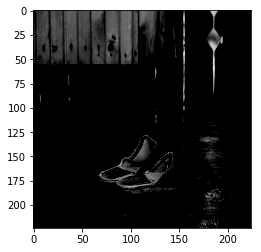

In [28]:
plt.imshow(imgs_for_input[60])

In [29]:
#predict for all images using the new simple model
prediction = model_simple.predict(imgs_for_input)

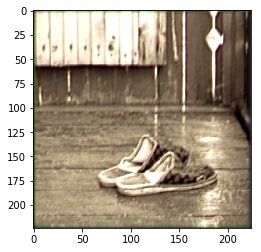

In [30]:
#display the predicted image
plt.imshow(prediction[60])